<a href="https://colab.research.google.com/github/amilsiddik/percobaan/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [1]:
!nvidia-smi

Tue Sep 13 03:00:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/Belajar/calonpembeli_ch5.csv')
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


Bersihkan data (Ada Usia lebih dari 100 tahun)

In [4]:
df1 = df1[df1['Usia']<=100]

cek apakah ada data null??

In [5]:
df1.isnull().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

In [6]:
df1.dropna()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [7]:
df1['Beli_Mobil'].value_counts()

1    633
0    365
Name: Beli_Mobil, dtype: int64

In [8]:
df1.corr(method='pearson')

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.179230,-0.007604,0.014657,0.066355,0.251684,0.166458
Usia,0.179230,1.000000,0.065891,0.023116,0.119189,0.167799,0.131373
Status,-0.007604,0.065891,1.000000,-0.010415,0.047378,0.070449,0.047566
Kelamin,0.014657,0.023116,-0.010415,1.000000,0.035375,-0.054303,-0.147604
Memiliki_Mobil,0.066355,0.119189,0.047378,0.035375,1.000000,0.134187,0.099189
Penghasilan,0.251684,0.167799,0.070449,-0.054303,0.134187,1.000000,0.762988
Beli_Mobil,0.166458,0.131373,0.047566,-0.147604,0.099189,0.762988,1.000000


In [9]:
import sklearn.model_selection as ms
X=df1[['Usia','Status','Kelamin','Memiliki_Mobil','Penghasilan']]
y=df1.Beli_Mobil
X_train, X_test, y_train, y_test=ms.train_test_split(X,y,test_size=0.2, random_state=0)

In [10]:
import sklearn.linear_model as lm
model = lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
print(model.coef_)

[[-0.0159435  -0.17093131 -1.03941699  0.07720535  0.05686692]]


In [12]:
y_prediksi=model.predict(X_test)
print(y_prediksi)

[1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1]


In [13]:
X_test.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416
727,45,2,1,1,131
31,37,2,1,1,203
344,58,0,0,1,265
606,53,1,0,1,348


In [15]:
import sklearn.metrics as met
confusionmatrix=met.confusion_matrix(y_test,y_prediksi)
print(confusionmatrix)

[[ 59   4]
 [  5 132]]


In [16]:
score=model.score(X_test,y_test)
print(score)

0.955


In [18]:
precision = met.precision_score(y_test,y_prediksi)
print(precision)

0.9705882352941176


In [19]:
auc = met.roc_auc_score(y_test, y_prediksi)
print(auc)

0.9500057930714866


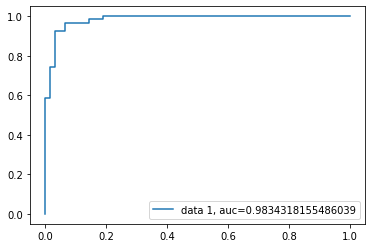

In [20]:
import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(X_test)[::,1]
fp, tp, _ =met.roc_curve(y_test, y_pred_proba)
auc = met.roc_auc_score(y_test,y_pred_proba)
plt.plot(fp,tp,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()